In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_Internal_dataset_editdt1.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]#.astype(float)
Y = dataset[:,-1]#.astype(int) 

#X 정규화

scaler = MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

#원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)

#데이터셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_split=17, min_samples_leaf=1, max_features=2, max_depth=1,
                                max_leaf_nodes=2,random_state=10)

#DecisionTreeClasifer 학습
dt_clf.fit(X_train, Y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성

#export_graphviz(dt_clf,out_file="tree.dot", feature_names=None, class_names=Y_encoded, impurity=True, filled=True)

#위에서 생성한 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
#with open("tree.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)    

#최대 정확도 0.8571 표준화, 정규화해도 동일

#cross val 실행
scores = cross_val_score(dt_clf,X_scaled, Y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:' ,np.round(scores,5))
print('평균 검증 정확도:', np.round(np.mean(scores),5))

#confision matrix
pred1 = dt_clf.predict(X_scaled)
conf_matrix = confusion_matrix(Y, pred1)
print(conf_matrix)

Decision Tree 예측 정확도 : 0.8333
교차 검증별 정확도: [0.5 0.8 0.8 0.6 0.4]
평균 검증 정확도: 0.62
[[ 0  0  6  0]
 [ 0  0  2  0]
 [ 0  0  8  0]
 [ 0  0  0 10]]


C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
import graphviz


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_Internal_dataset_edit1.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]#.astype(float)
Y = dataset[:,-1]#.astype(int)

#X 표준화

scaler =StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

#원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)

#데이터셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_scaled, Y)

# DecisionTreeClassifier의 하이퍼 파리미터 추출
#print('\nDecisionTreeClassifier 기본 하이퍼파라미터:\n', dt_clf.get_params())

#파라미터 튜닝
parameters = {'min_samples_split':list(range(2,20)), 
              'min_samples_leaf': list(range(1,10)), 
              'max_features': list(range(2,4)), 
              'max_depth': list(range(1,6)), 
              'max_leaf_nodes': list(range(2,10))}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, verbose=1)
grid_dclf.fit(X_train, Y_train)

print('Decision Tree 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('Decision Tree 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#DecisionTreeClasifer 학습

best_dclf.fit(X_train, Y_train)
pred = best_dclf.predict(X_scaled)
accuracy = accuracy_score(Y, pred)

print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성

#export_graphviz(best_dclf,out_file="tree.dot", feature_names=None, class_names=Y_encoded, impurity=True, filled=True)

#위에서 생성한 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
#with open("tree.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)    

#cross val 실행
scores = cross_val_score(best_dclf,X_scaled, Y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:' ,np.round(scores,5))
print('평균 검증 정확도:', np.round(np.mean(scores),5))

#confusion matrix 실행
conf_matrix = confusion_matrix(Y, pred)
print(conf_matrix)

#외부 데이터세트로 실행
ex = pd.read_csv('./VRK2_inhibitor_descriptor_external_dataset_edit1.csv')

datasetex = ex.values
exX = dataset[:,0:-1]#.astype(float)
exY = dataset[:,-1]#.astype(int)

#X 표준화

scaler =StandardScaler()

scaler.fit(exX)
exX_scaled = scaler.transform(X)

expred = best_dclf.predict(exX_scaled)
accuracy = accuracy_score(exY, expred)

print('Decision Tree 외부세트 예측 정확도 : {0:.4f}'.format(accuracy))

#confusion matrix 실행
#ex_conf_matrix = confusion_matrix(exY, expred)
#print(ex_conf_matrix)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 64800 out of 64800 | elapsed:  3.1min finished


Decision Tree 최적 하이퍼 파라미터 : {'max_depth': 2, 'max_features': 3, 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree 최고 정확도 : 0.8500
Decision Tree 예측 정확도 : 0.9231
교차 검증별 정확도: [0.83333 1.      1.      0.8     0.4    ]
평균 검증 정확도: 0.80667
[[ 6  0  0  0]
 [ 2  0  0  0]
 [ 0  0  8  0]
 [ 0  0  0 10]]
Decision Tree 외부세트 예측 정확도 : 0.9231
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 0. 0. 0. 0.
 0. 0.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.
 0. 0.]


C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf
import graphviz
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_Internal_dataset_dropunmane.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:3336]#.astype(float)
Y = dataset[:,3337]

#X 정규화

scaler = MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

#원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)

#데이터셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=10)

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth=3, max_features=4, max_leaf_nodes=5, min_samples_leaf=2, 
                                min_samples_split=6, random_state=10)

#DecisionTreeClasifer 학습
dt_clf.fit(X_train, Y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

#최대 정확도 0.8571 표준화, 정규화해도 동일

#f1 = f1_score(Y_test,dt_clf,average='macro')
#print(f1)

importance = dt_clf.feature_importances_
a = pd.Series(importance)
a.to_csv('./decisiontree_importance.csv')
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.8f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.axis([3000, 3335, 0, 0.4])
#plt.show()



Decision Tree 예측 정확도 : 0.1667
Feature: 0, Score: 0.00000000
Feature: 1, Score: 0.00000000
Feature: 2, Score: 0.00000000
Feature: 3, Score: 0.00000000
Feature: 4, Score: 0.00000000
Feature: 5, Score: 0.00000000
Feature: 6, Score: 0.00000000
Feature: 7, Score: 0.00000000
Feature: 8, Score: 0.00000000
Feature: 9, Score: 0.00000000
Feature: 10, Score: 0.00000000
Feature: 11, Score: 0.00000000
Feature: 12, Score: 0.00000000
Feature: 13, Score: 0.00000000
Feature: 14, Score: 0.00000000
Feature: 15, Score: 0.00000000
Feature: 16, Score: 0.00000000
Feature: 17, Score: 0.00000000
Feature: 18, Score: 0.00000000
Feature: 19, Score: 0.00000000
Feature: 20, Score: 0.00000000
Feature: 21, Score: 0.00000000
Feature: 22, Score: 0.00000000
Feature: 23, Score: 0.00000000
Feature: 24, Score: 0.00000000
Feature: 25, Score: 0.00000000
Feature: 26, Score: 0.00000000
Feature: 27, Score: 0.00000000
Feature: 28, Score: 0.00000000
Feature: 29, Score: 0.00000000
Feature: 30, Score: 0.00000000
Feature: 31, Score:

Feature: 2185, Score: 0.00000000
Feature: 2186, Score: 0.00000000
Feature: 2187, Score: 0.00000000
Feature: 2188, Score: 0.00000000
Feature: 2189, Score: 0.00000000
Feature: 2190, Score: 0.00000000
Feature: 2191, Score: 0.00000000
Feature: 2192, Score: 0.00000000
Feature: 2193, Score: 0.00000000
Feature: 2194, Score: 0.00000000
Feature: 2195, Score: 0.00000000
Feature: 2196, Score: 0.00000000
Feature: 2197, Score: 0.00000000
Feature: 2198, Score: 0.00000000
Feature: 2199, Score: 0.00000000
Feature: 2200, Score: 0.00000000
Feature: 2201, Score: 0.00000000
Feature: 2202, Score: 0.00000000
Feature: 2203, Score: 0.00000000
Feature: 2204, Score: 0.00000000
Feature: 2205, Score: 0.00000000
Feature: 2206, Score: 0.00000000
Feature: 2207, Score: 0.00000000
Feature: 2208, Score: 0.00000000
Feature: 2209, Score: 0.00000000
Feature: 2210, Score: 0.00000000
Feature: 2211, Score: 0.00000000
Feature: 2212, Score: 0.00000000
Feature: 2213, Score: 0.00000000
Feature: 2214, Score: 0.00000000
Feature: 2

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selec

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.25672515        nan 0.28888889 ... 0.4502924  0.4502924  0.29590643]
  warnings.warn(


Decision Tree 예측 정확도 : 0.5484
교차 검증별 정확도: [0.52632 0.57895 0.47368 0.44444 0.72222]
평균 검증 정확도: 0.54912
best parameter: <bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=2, max_features=11, max_leaf_nodes=10,
                       min_samples_leaf=8, min_samples_split=17,
                       random_state=63)>
[[ 9 21  0  0]
 [ 3 42  0  0]
 [ 0  8  0  0]
 [ 0 10  0  0]]
Decision Tree 외부세트 예측 정확도 : 0.5000
[[1 2 0 0]
 [4 9 0 0]
 [0 2 0 0]
 [0 2 0 0]]
Decision Tree 전체세트 예측 정확도 : 0.5398
[[10 23  0  0]
 [ 7 51  0  0]
 [ 0 10  0  0]
 [ 0 12  0  0]]


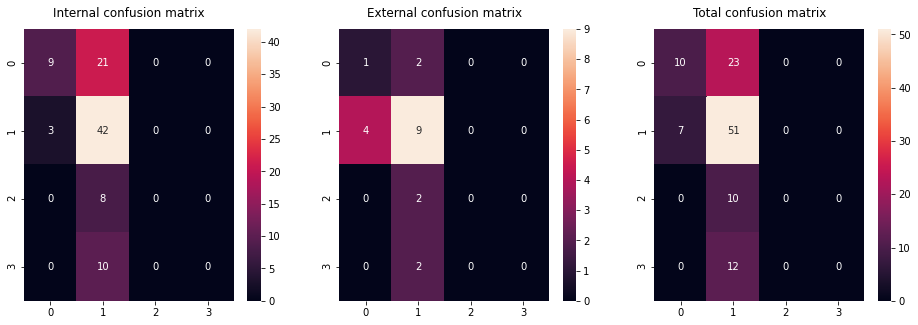

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import graphviz
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

#데이터 입력
df = pd.read_csv('/Users/eunwoo/csv_edit/PA_inhibitor_descriptor_internal_dataset.csv')
df1 = pd.read_csv('/Users/eunwoo/csv_edit/PA_inhibitor_descriptor_external_dataset.csv')
df2 = pd.concat([df, df1])

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]
Y = dataset[:,-1]

ex_data =df1.values
exX = ex_data[:,0:-1]
exY = ex_data[:,-1]

tot_data = df2.values
totX = tot_data[:,0:-1]
totY = tot_data[:,-1]

#X 표준화

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
exX_scaled = scaler.transform(exX)
totX_scaled = scaler.transform(totX)

#DecisionTree Classifier 생성

dt = DecisionTreeClassifier()

#파라미터 튜닝
parameters = {'min_samples_split':list(range(1,20)), 'min_samples_leaf': list(range(1,10)), 
              'max_features': list(range(2,20)), 'max_depth': list(range(1,10)), 
              'max_leaf_nodes': list(range(2,20)), 'random_state': list(range(1,100))}
dt_clf = RandomizedSearchCV(dt, parameters, scoring='accuracy', cv=5, n_iter = 5000, verbose=1)
dt_clf.fit(X_scaled, Y)

df_best = dt_clf.best_estimator_

pred = df_best.predict(X_scaled)
accuracy = accuracy_score(Y, pred)

print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

#cross val 실행
scores = cross_val_score(df_best,X_scaled, Y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:' ,np.round(scores,5))
print('평균 검증 정확도:', np.round(np.mean(scores),5))
print('best parameter:', df_best.get_params)

#confusion matrix 실행
conf_matrix = confusion_matrix(Y, pred,labels=[0,1,2,3])
print(conf_matrix)

expred = df_best.predict(exX_scaled)
accuracy = accuracy_score(exY, expred)

print('Decision Tree 외부세트 예측 정확도 : {0:.4f}'.format(accuracy))

ex_conf_matrix = confusion_matrix(exY, expred,labels=[0,1,2,3])
print(ex_conf_matrix)

tot_pred = df_best.predict(totX_scaled)
accuracy = accuracy_score(totY, tot_pred)

print('Decision Tree 전체세트 예측 정확도 : {0:.4f}'.format(accuracy))

conf_matrix_tot = confusion_matrix(totY, tot_pred, labels=[0,1,2,3])
print(conf_matrix_tot)

#시각화
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0])
ax[0].set_title('Internal confusion matrix', pad = 12)
sns.heatmap(ex_conf_matrix, annot=True, ax=ax[1])
ax[1].set_title('External confusion matrix', pad = 12)
sns.heatmap(conf_matrix_tot, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 12)

#모델 저장
saved_model = joblib.dump(dt_clf,'./PA_DecisionTree.pkl')